In [1]:
from CollectMaPSAs import *
import ROOT
import cPickle
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/00


In [2]:
plt.rc('font', size=22, weight='bold', family='sans-serif')
plt.rc('axes', titlesize=22)#, labelsize=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=22)
plt.rc('figure', titlesize=22)

In [3]:
#name = "round2tot-HPK"
#vendor = "Vendor 1"

name = "round2abcde-QuikPak"
vendor = "Vendor 2"

In [4]:
f1 = name+".txt"
outdir = name

In [5]:
mapsa_names = []
mapsas = []
    
print('Reading MaPSA names from ' + f1)
with open(f1) as f:
    reader = csv.reader(f)
    mapsa_names = [row[0] for row in reader]

for m in mapsa_names:

    # Read MaPSA object from file, if available
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        print("Loading MaPSA " + m)
        mapsa = cPickle.load(open(fname,'rb'))
    else: # Create it
        mapsa = MaPSA(m)

    mapsas += [mapsa]

Reading MaPSA names from round2abcde-QuikPak.txt
Loading MaPSA QuikPak_PS-p-P1_kapton
Loading MaPSA QuikPak_PS-p-P1_4_kapton
Loading MaPSA QuikPak_PS-p-P2
Loading MaPSA QuikPak_PS-p-P2_4_kapton
Loading MaPSA QP_N2XM21
Loading MaPSA QP_N6T902N2XM21
Loading MaPSA QP_no10
Loading MaPSA QP_no12
Loading MaPSA QP_no8
Loading MaPSA QP_N6T902
Loading MaPSA QP_N6T902b
Loading MaPSA QP_no11
Loading MaPSA QP_no13
Loading MaPSA QP_no9
Loading MaPSA QP_no15
Loading MaPSA QP_no16
Loading MaPSA QP_no14
Loading MaPSA QP_no17p2
Loading MaPSA QP_no18p2
Loading MaPSA QP_no20p1
Loading MaPSA QP_no14p2
Loading MaPSA QP_no18p1
Loading MaPSA QP_no3p16
Loading MaPSA QP_no24p1
Loading MaPSA QP_no22p2
Loading MaPSA QP_no24p2
Loading MaPSA QP_no20p1b
Loading MaPSA QP_no24p1b
Loading MaPSA QP_no17p2b
Loading MaPSA QP_no20p2
Loading MaPSA QP_no20p2b
Loading MaPSA QP_no22p2b
Loading MaPSA QP_no17p2c
Loading MaPSA QP_no20p1c
Loading MaPSA QP_no22p1
Loading MaPSA QP_no24p1c
Loading MaPSA QP_no27p1


Processing 37 MaPSAs for IV plot


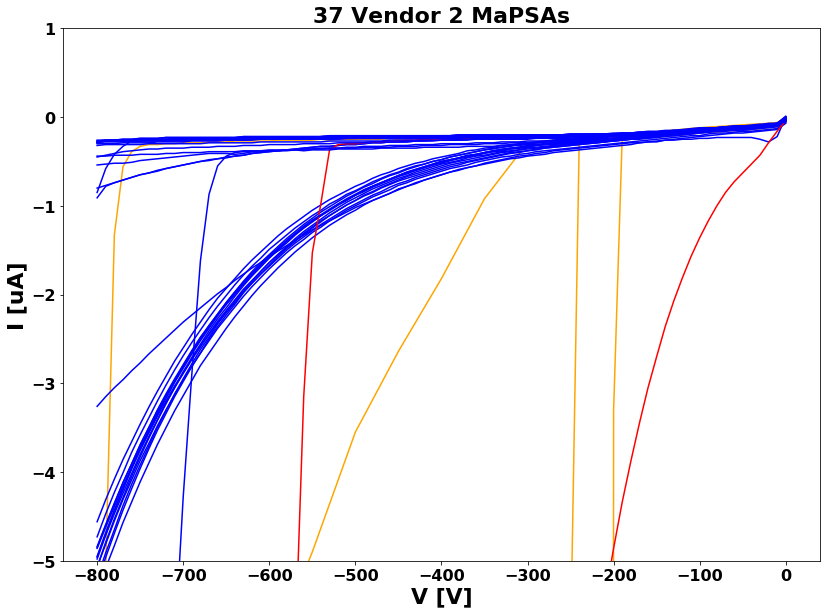

In [27]:
# IV plot
print("Processing " + str(len(mapsas)) + " MaPSAs for IV plot")

fig, ax = plt.subplots(figsize=(12,9))
for m in mapsas:
    if m.name in ['QuikPak_PS-p-P1_kapton','QuikPak_PS-p-P1_4_kapton','QuikPak_PS-p-P2','QuikPak_PS-p-P2_4_kapton']:
        ax.plot(m.IV["V"],m.IV["I"],color='orange')    
    elif m.IV["I"][60] < -10:
        ax.plot(m.IV["V"],m.IV["I"],color='red')
    else:
        ax.plot(m.IV["V"],m.IV["I"],color='blue')
        
#    ax.legend([m.name for m in mapsas],frameon=False)
ax.set_xlabel("V [V]",fontweight='bold')
ax.set_ylabel("I [uA]",fontweight='bold')
ax.set_ylim(-5,1)
plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')

plt.tight_layout()
plt.show()

fig.savefig(outdir+"/IV.png",bbox_inches='tight')
fig.savefig(outdir+"/IV.pdf",bbox_inches='tight')

In [7]:
# MPA current draws
print("Processing " + str(len(mapsas)) + " MaPSAs for current plots")

I = {}
I['ana'] = [[],[]]
I['dig'] = [[],[]]
I['pad'] = [[],[]]
I['tot'] = [[],[]]

Inames = {}
Inames['ana'] = "I_{analog} [uA]"
Inames['dig'] = "I_{digital} [uA]"
Inames['pad'] = "I_{pad} [uA]"
Inames['tot'] = "I_{total} [uA]"

nchips_good = 0
nchips_bad = 0

minval = -10
maxval = 1000

for m in mapsas:
    for chip in m.mpa_chips:
        if chip.mapsa_name+"-"+str(chip.index) in badchips:
            I['ana'][0] += [np.clip(chip.I_ana,minval,maxval)]
            I['dig'][0] += [np.clip(chip.I_dig,minval,maxval)]
            I['pad'][0] += [np.clip(chip.I_pad,minval,maxval)]
            I['tot'][0] += [chip.I_tot]
            nchips_bad += 1
        else:
            I['ana'][1] += [np.clip(chip.I_ana,minval,maxval)]
            I['dig'][1] += [np.clip(chip.I_dig,minval,maxval)]
            I['pad'][1] += [np.clip(chip.I_pad,minval,maxval)]
            I['tot'][1] += [np.clip(chip.I_tot,minval,maxval)]
            nchips_good += 1

Processing 37 MaPSAs for current plots


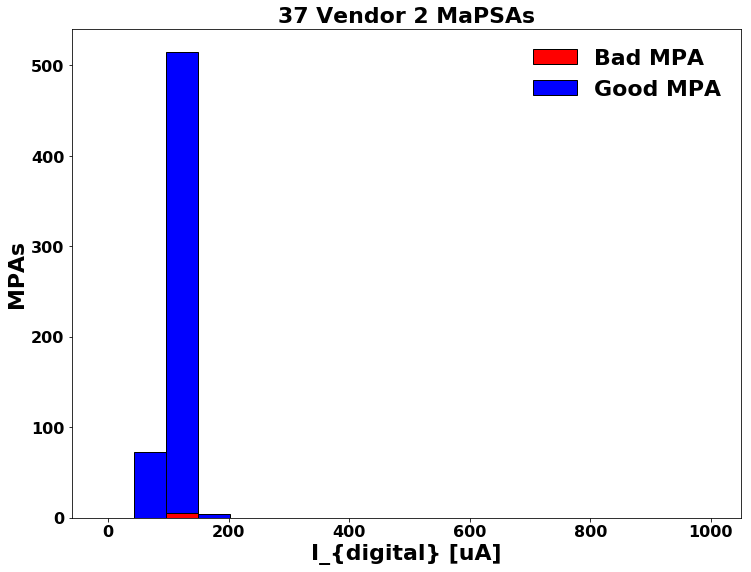

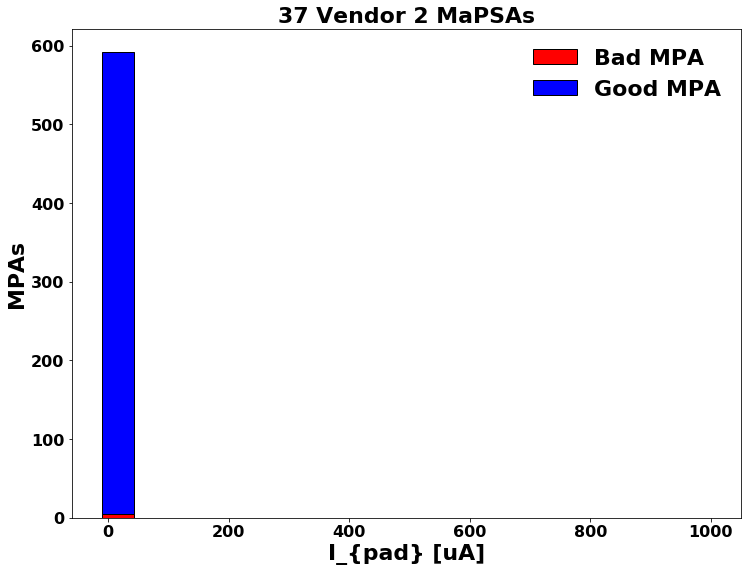

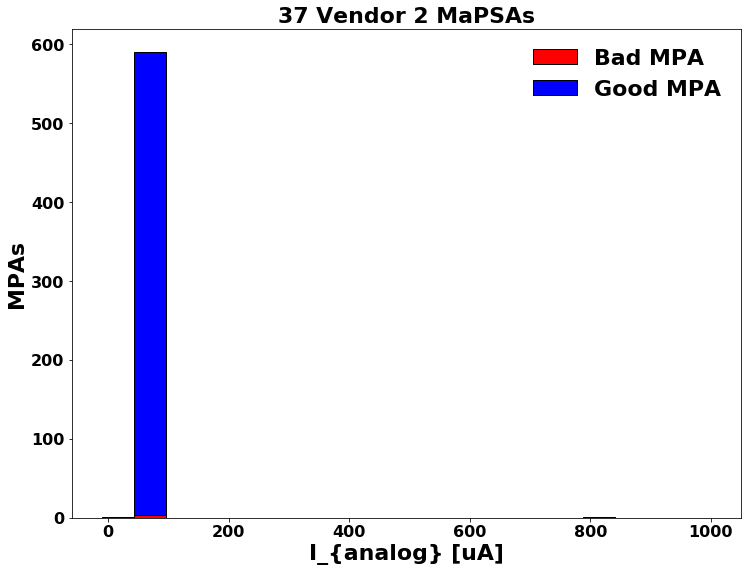

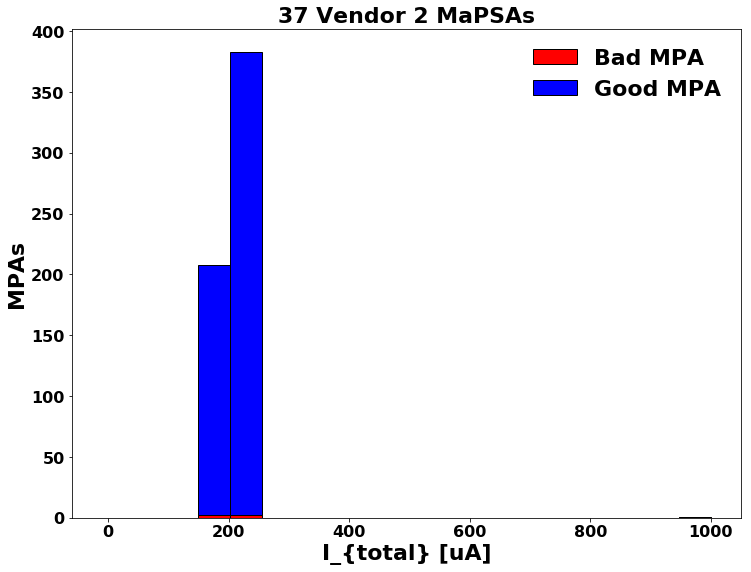

In [8]:
for c in I.keys():

    fig1, ax1 = plt.subplots(figsize=(12,9))
    bins = np.linspace(-10,1000,20)
    
    plt.hist(np.array(I[c]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
    ax1.set_xlabel(Inames[c],fontweight='bold')
    ax1.set_ylabel("MPAs",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Bad MPA","Good MPA"],frameon=False)
    plt.show()

    fig1.savefig(outdir+"/I_"+c+".png",bbox_inches='tight')
    fig1.savefig(outdir+"/I_"+c+".pdf",bbox_inches='tight')

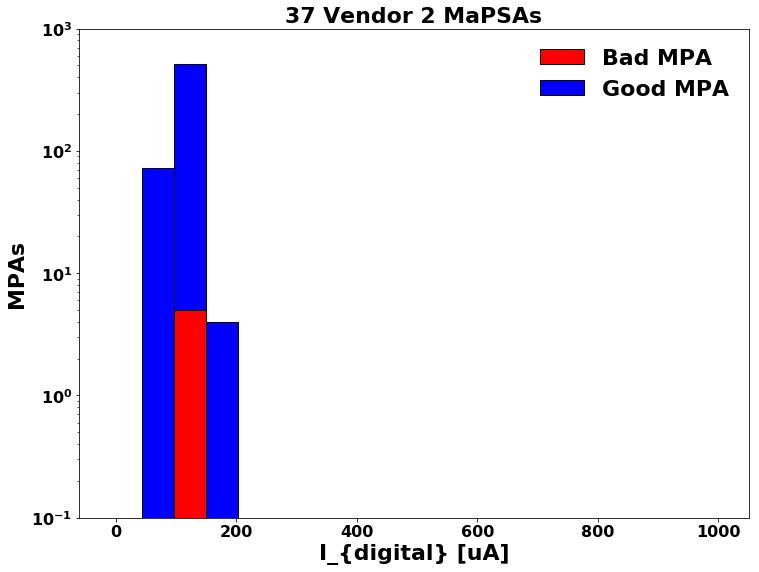

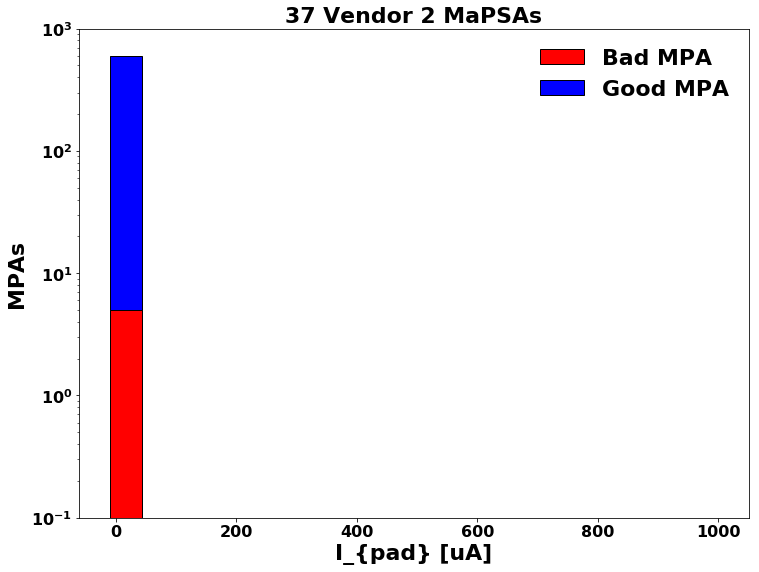

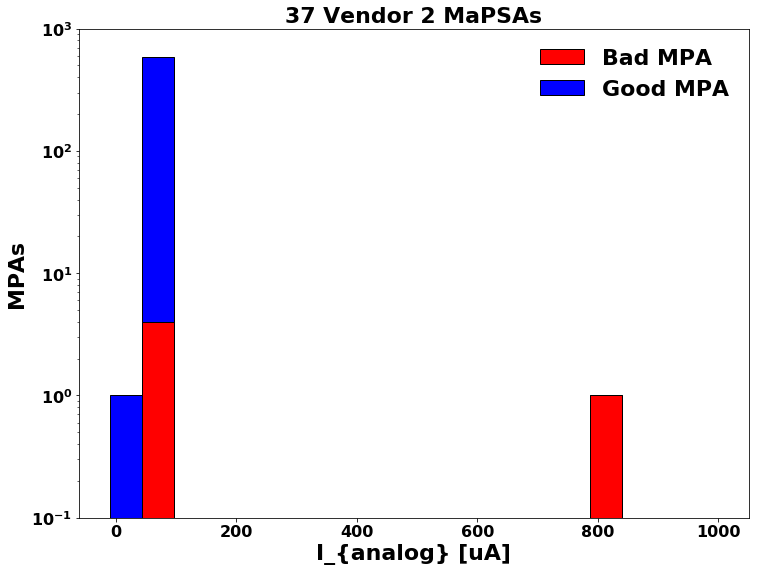

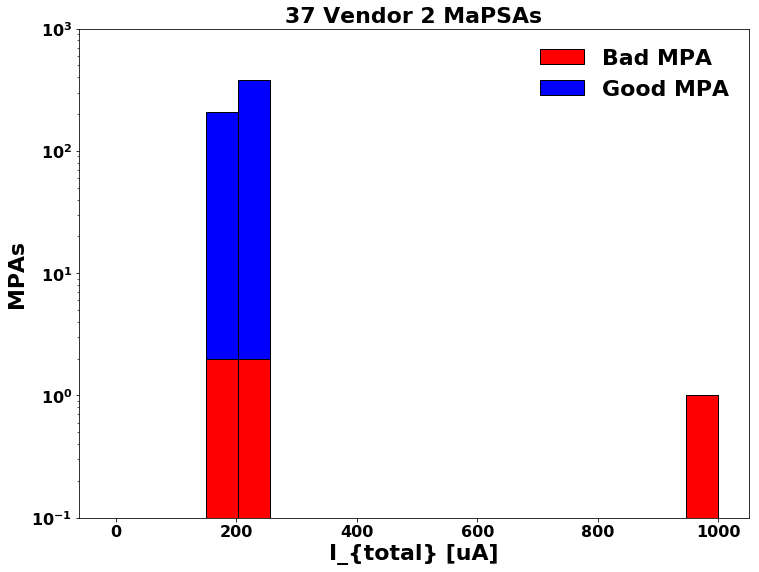

In [9]:
for c in I.keys():

    fig1, ax1 = plt.subplots(figsize=(12,9))
    bins = np.linspace(-10,1000,20)
        
    plt.hist(np.array(I[c]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
    ax1.set_xlabel(Inames[c],fontweight='bold')
    ax1.set_ylabel("MPAs",fontweight='bold')
    ax1.set(yscale='log',ylim=[0.1,1000])
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Bad MPA","Good MPA"],frameon=False)
    plt.show()

    fig1.savefig(outdir+"/I_"+c+"_log.png",bbox_inches='tight')
    fig1.savefig(outdir+"/I_"+c+"_log.pdf",bbox_inches='tight')

In [10]:
# Memory plots
print("Processing " + str(len(mapsas)) + " MaPSAs for memory plots")
Mem1 = {}
Mem1['error'] = [[],[]]
Mem1['stuck'] = [[],[]]
Mem1['i2c'] = [[],[]]
Mem1['miss'] = [[],[]]

Mem2 = {}
Mem2['error'] = [[],[]]
Mem2['stuck'] = [[],[]]
Mem2['i2c'] = [[],[]]
Mem2['miss'] = [[],[]]

nchips_good = 0
nchips_bad = 0

minval = -2.5
maxval = 4.5

for m in mapsas:
     for chip in m.mpa_chips:
        if chip.mapsa_name+"-"+str(chip.index) in badchips:
            Mem1['error'][0] += [np.clip(chip.memerrs["error"]["1.0V"],minval,maxval)]
            Mem1['stuck'][0] += [np.clip(chip.memerrs["stuck"]["1.0V"],minval,maxval)]
            Mem1['i2c'][0]   += [np.clip(chip.memerrs["I2C"]["1.0V"],minval,maxval)]
            Mem1['miss'][0]  += [np.clip(chip.memerrs["missing"]["1.0V"],minval,maxval)]
            
            Mem2['error'][0] += [np.clip(chip.memerrs["error"]["1.2V"],minval,maxval)]
            Mem2['stuck'][0] += [np.clip(chip.memerrs["stuck"]["1.2V"],minval,maxval)]
            Mem2['i2c'][0]   += [np.clip(chip.memerrs["I2C"]["1.2V"],minval,maxval)]
            Mem2['miss'][0]  += [np.clip(chip.memerrs["missing"]["1.2V"],minval,maxval)]
                
            nchips_bad += 1
        else:
            Mem1['error'][1] += [np.clip(chip.memerrs["error"]["1.0V"],minval,maxval)]
            Mem1['stuck'][1] += [np.clip(chip.memerrs["stuck"]["1.0V"],minval,maxval)]
            Mem1['i2c'][1]   += [np.clip(chip.memerrs["I2C"]["1.0V"],minval,maxval)]
            Mem1['miss'][1]  += [np.clip(chip.memerrs["missing"]["1.0V"],minval,maxval)]
            
            Mem2['error'][1] += [np.clip(chip.memerrs["error"]["1.2V"],minval,maxval)]
            Mem2['stuck'][1] += [np.clip(chip.memerrs["stuck"]["1.2V"],minval,maxval)]
            Mem2['i2c'][1]   += [np.clip(chip.memerrs["I2C"]["1.2V"],minval,maxval)]
            Mem2['miss'][1]  += [np.clip(chip.memerrs["missing"]["1.2V"],minval,maxval)]
            
            nchips_good += 1

Processing 37 MaPSAs for memory plots


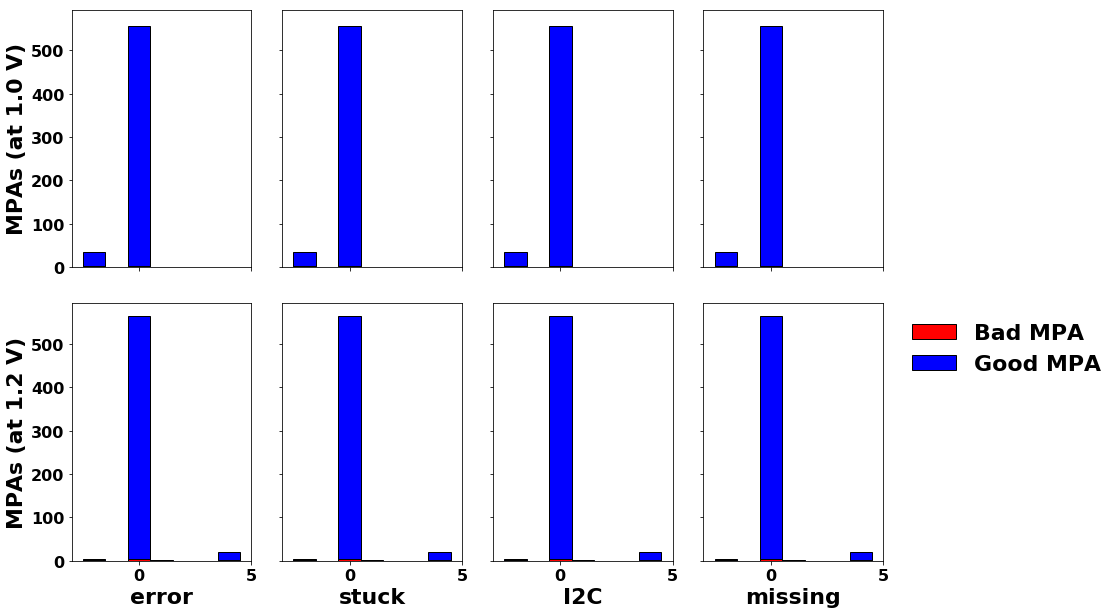

In [11]:
fig, ax = plt.subplots(2,4, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_figheight(9)
fig.set_figwidth(16)

bins=[-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5]
    
ax[0,0].hist(np.array(Mem1['error']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[0,0].set_ylabel("MPAs (at 1.0 V)",fontweight='bold')
ax[0,1].hist(np.array(Mem1['stuck']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[0,2].hist(np.array(Mem1['i2c']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[0,3].hist(np.array(Mem1['miss']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')


ax[1,0].hist(np.array(Mem2['error']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[1,0].set_xlabel("error",fontweight='bold')
ax[1,0].set_ylabel("MPAs (at 1.2 V)",fontweight='bold')
ax[1,1].hist(np.array(Mem2['stuck']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[1,1].set_xlabel("stuck",fontweight='bold')
ax[1,2].hist(np.array(Mem2['i2c']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[1,2].set_xlabel("I2C",fontweight='bold')
ax[1,3].hist(np.array(Mem2['miss']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[1,3].set_xlabel("missing",fontweight='bold')

for i in range(0,2):
    for j in range(0,4):
        ax[i,j].set(xlim=[-3,5])

plt.legend(["Bad MPA","Good MPA"],frameon=False,bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

fig.savefig(outdir+"/Memory.png",bbox_inches='tight')
fig.savefig(outdir+"/Memory.pdf",bbox_inches='tight')

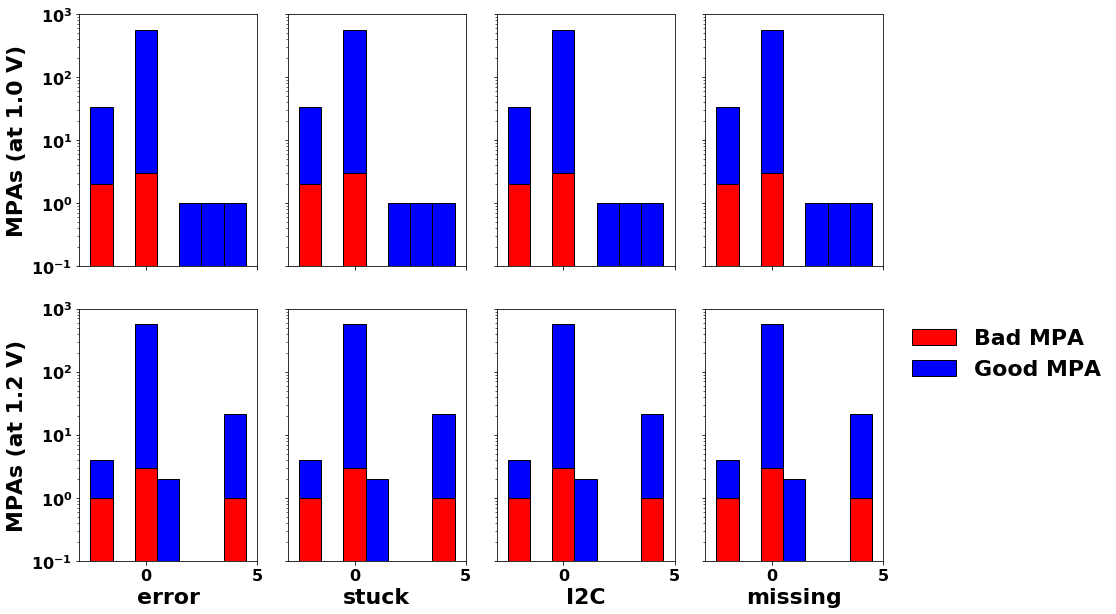

In [12]:
fig, ax = plt.subplots(2,4, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_figheight(9)
fig.set_figwidth(16)

bins=[-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5]
    
ax[0,0].hist(np.array(Mem1['error']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[0,0].set_ylabel("MPAs (at 1.0 V)",fontweight='bold')
ax[0,1].hist(np.array(Mem1['stuck']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[0,2].hist(np.array(Mem1['i2c']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[0,3].hist(np.array(Mem1['miss']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')

ax[1,0].hist(np.array(Mem2['error']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[1,0].set_xlabel("error",fontweight='bold')
ax[1,0].set_ylabel("MPAs (at 1.2 V)",fontweight='bold')
ax[1,1].hist(np.array(Mem2['stuck']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[1,1].set_xlabel("stuck",fontweight='bold')
ax[1,2].hist(np.array(Mem2['i2c']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[1,2].set_xlabel("I2C",fontweight='bold')
ax[1,3].hist(np.array(Mem2['miss']),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax[1,3].set_xlabel("missing",fontweight='bold')

for i in range(0,2):
    for j in range(0,4):
        ax[i,j].set(xlim=[-3,5])
        ax[i,j].set(yscale='log',ylim=[0.1,1000])

plt.legend(["Bad MPA","Good MPA"],frameon=False,bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

fig.savefig(outdir+"/Memory_log.png",bbox_inches='tight')
fig.savefig(outdir+"/Memory_log.pdf",bbox_inches='tight')

In [13]:
print("Processing " + str(len(mapsas)) + " MaPSAs register plots")

regerr = {}
regerr["peri"] = [[],[]]
regerr["row"] = [[],[]]
regerr["pixel"] = [[],[]]

nchips_good = 0
nchips_bad = 0

minval=-2.5
maxval=2.5

for m in mapsas:
    for chip in m.mpa_chips:
        if chip.mapsa_name+"-"+str(chip.index) in badchips:
            regerr["peri"][0]  += [np.clip(chip.regerr_peri,minval,maxval)]
            regerr["row"][0]   += [np.clip(chip.regerr_row,minval,maxval)]
            regerr["pixel"][0] += [np.clip(chip.regerr_pixel,minval,maxval)]
            nchips_bad += 1
        else:
            regerr["peri"][1]  += [np.clip(chip.regerr_peri,minval,maxval)]
            regerr["row"][1]   += [np.clip(chip.regerr_row,minval,maxval)]
            regerr["pixel"][1] += [np.clip(chip.regerr_pixel,minval,maxval)]
            nchips_good += 1

Processing 37 MaPSAs register plots


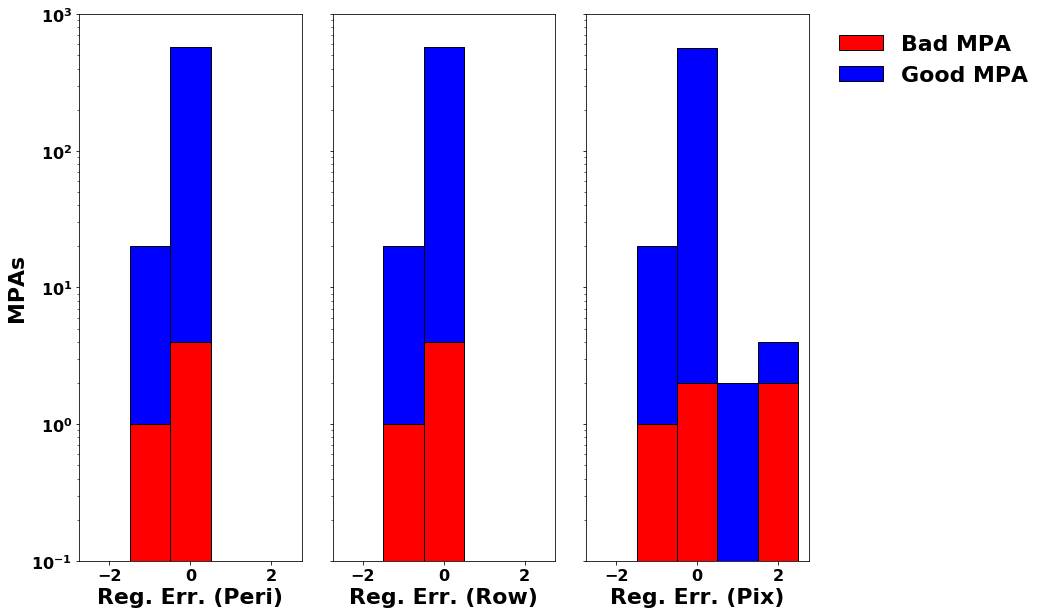

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_figheight(9)
fig.set_figwidth(15)

bins=[-2.5,-1.5,-0.5,0.5,1.5,2.5]

ax1.hist(np.array(regerr["peri"]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax1.set_xlabel("Reg. Err. (Peri)",fontweight='bold')
ax1.set_ylabel("MPAs",fontweight='bold')

ax2.hist(np.array(regerr["row"]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax2.set_xlabel("Reg. Err. (Row)",fontweight='bold')

ax3.hist(np.array(regerr["pixel"]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax3.set_xlabel("Reg. Err. (Pix)",fontweight='bold')

ax1.set(yscale='log',ylim=[0.1,1000])
ax2.set(yscale='log',ylim=[0.1,1000])
ax3.set(yscale='log',ylim=[0.1,1000])

plt.legend(["Bad MPA","Good MPA"],frameon=False,bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

fig.savefig(outdir+"/Register_log.png",bbox_inches='tight')
fig.savefig(outdir+"/Register_log.pdf",bbox_inches='tight')

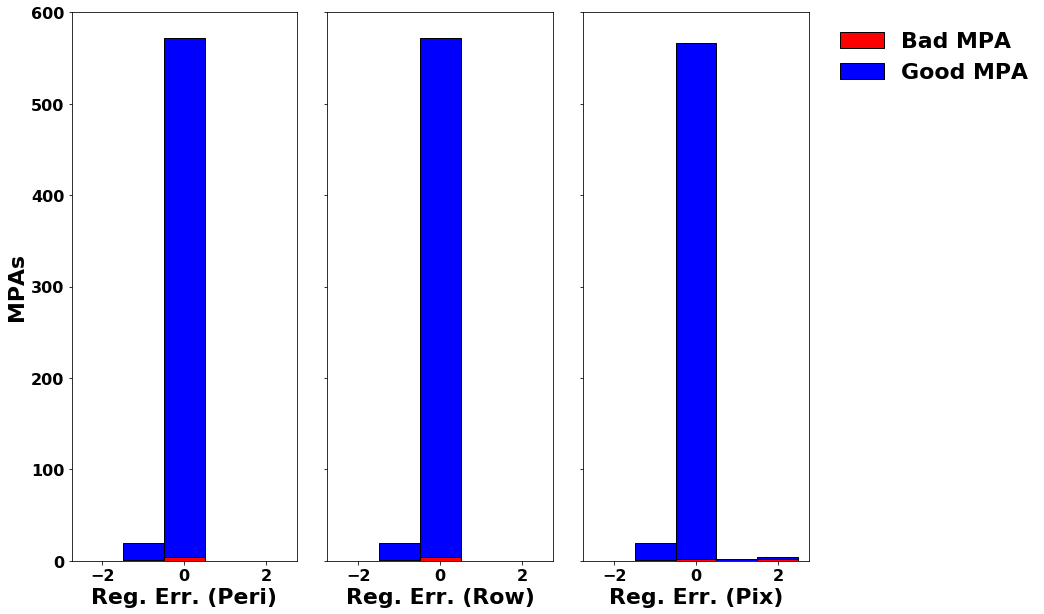

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_figheight(9)
fig.set_figwidth(15)

bins=[-2.5,-1.5,-0.5,0.5,1.5,2.5]

ax1.hist(np.array(regerr["peri"]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax1.set_xlabel("Reg. Err. (Peri)",fontweight='bold')
ax1.set_ylabel("MPAs",fontweight='bold')

ax2.hist(np.array(regerr["row"]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax2.set_xlabel("Reg. Err. (Row)",fontweight='bold')

ax3.hist(np.array(regerr["pixel"]),bins=bins,histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
ax3.set_xlabel("Reg. Err. (Pix)",fontweight='bold')

plt.legend(["Bad MPA","Good MPA"],frameon=False,bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

fig.savefig(outdir+"/Register.png",bbox_inches='tight')
fig.savefig(outdir+"/Register.pdf",bbox_inches='tight')

In [29]:
# Pixel plots
print("Processing " + str(len(mapsas)) + " MaPSAs for pixel plots")

badchips = []
badchips += ["HPK36_1-1","HPK36_1-11","HPK32_2-2","HPK32_2-3","HPK32_2-14"]
badchips += ["QP_no18p2-14","QP_no27p1-13","QP_no14-2","QP_no14-3","QP_no27p1c-1"]

allpix = pd.DataFrame([])
allpix_bad = pd.DataFrame([])

for m in mapsas:
    for chip in m.mpa_chips:
        if chip.mapsa_name+"-"+str(chip.index) in badchips:
            allpix_bad = allpix_bad.append(chip.pixels)
        else:
            allpix = allpix.append(chip.pixels)
            
        n = len(chip.pixels["mask"][chip.pixels["mask"]<0])
        if n>0:
            print('small',m.name,n)
            
        n = len(chip.pixels["mask"][chip.pixels["mask"]>0])
        if n>0:
            print('large',m.name,n)

if len(allpix_bad) == 0:
    allpix_bad = pd.DataFrame(columns=allpix.columns)

npix = len(allpix["pa"])
print(npix)

logmax = npix*50

Processing 37 MaPSAs for pixel plots
('large', 'QP_N6T902b', 1)
('small', 'QP_no14', 2)
('small', 'QP_no14', 1)
('small', 'QP_no24p1c', 2)
('large', 'QP_no24p1c', 2)
1110144


In [17]:
cols = ["pa","mask","CAL_Mean","CAL_Mean_pretrim","CAL_RMS","CAL_RMS_pretrim","THR_Mean","THR_Mean_pretrim","THR_RMS","THR_RMS_pretrim","Bump_RMS"]
names = {}
names["pa"] = "alive"
names["mask"] = "is unmaskable"
names["CAL_Mean"] = "CAL mean"
names["CAL_Mean_pretrim"] = "CAL mean (before trimming)"
names["CAL_RMS"] = "CAL noise"
names["CAL_RMS_pretrim"] = "THR noise (before trimming)"
names["THR_Mean"] = "THR mean"
names["THR_Mean_pretrim"] = "THR mean (before trimming)"
names["THR_RMS"] = "THR noise"
names["THR_RMS_pretrim"] = "THR noise (before trimming)"
names["Bump_RMS"] = "Bump test noise at -2V"

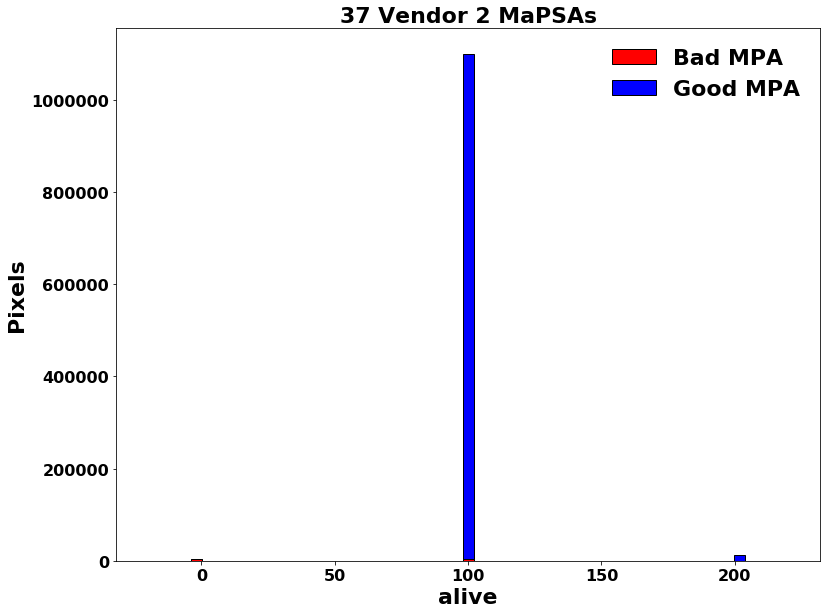

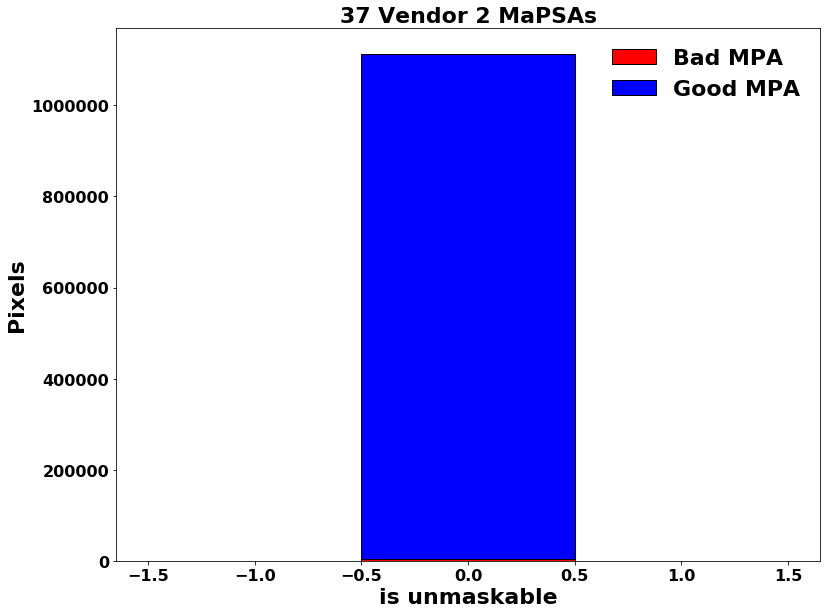

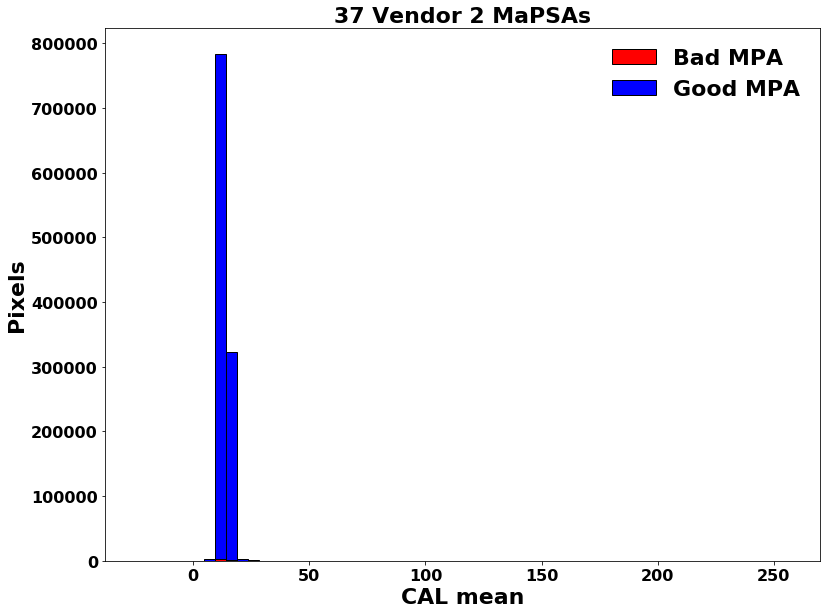

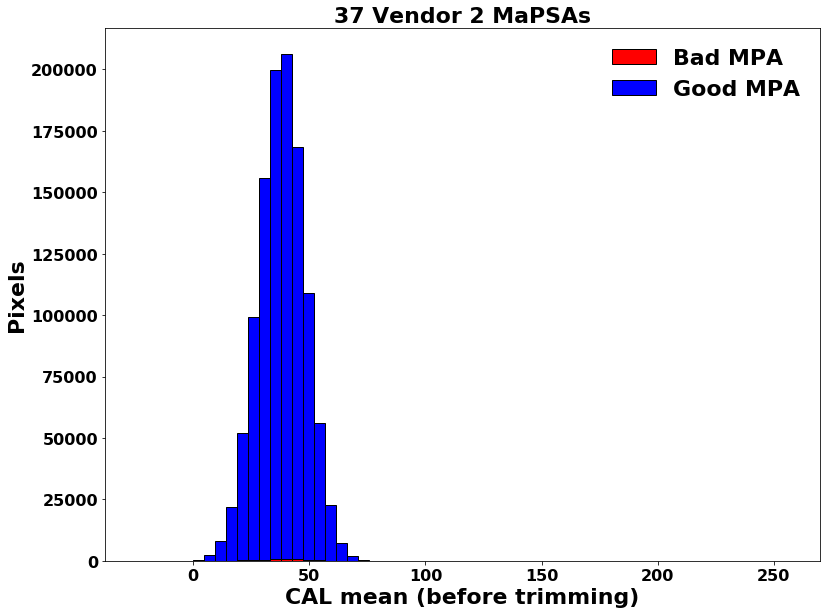

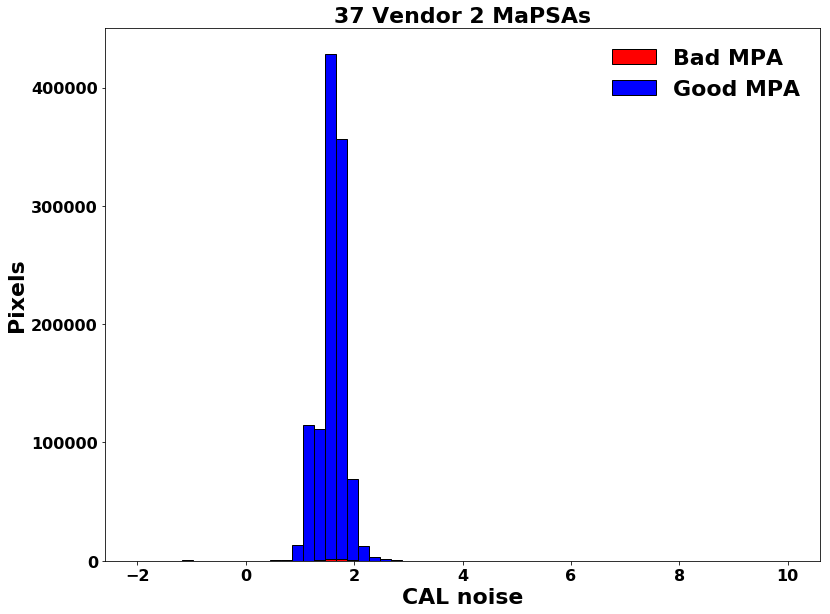

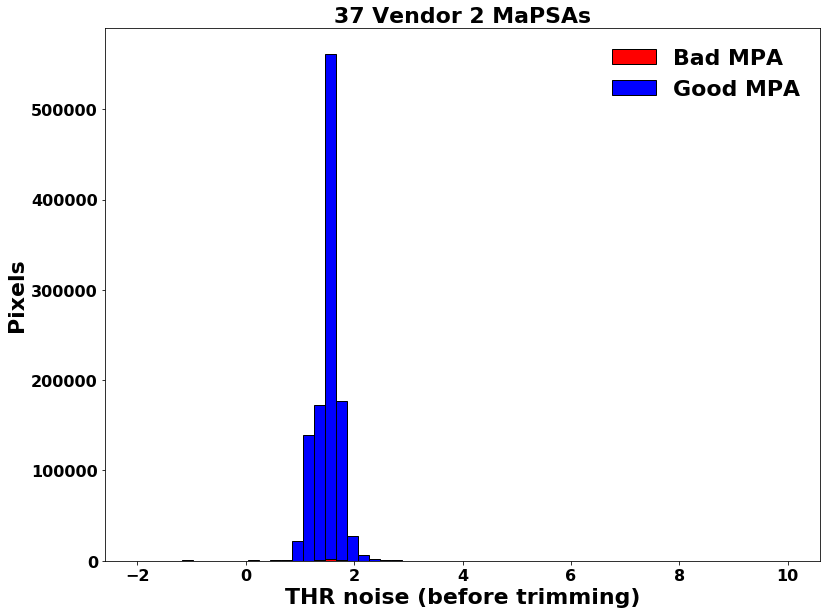

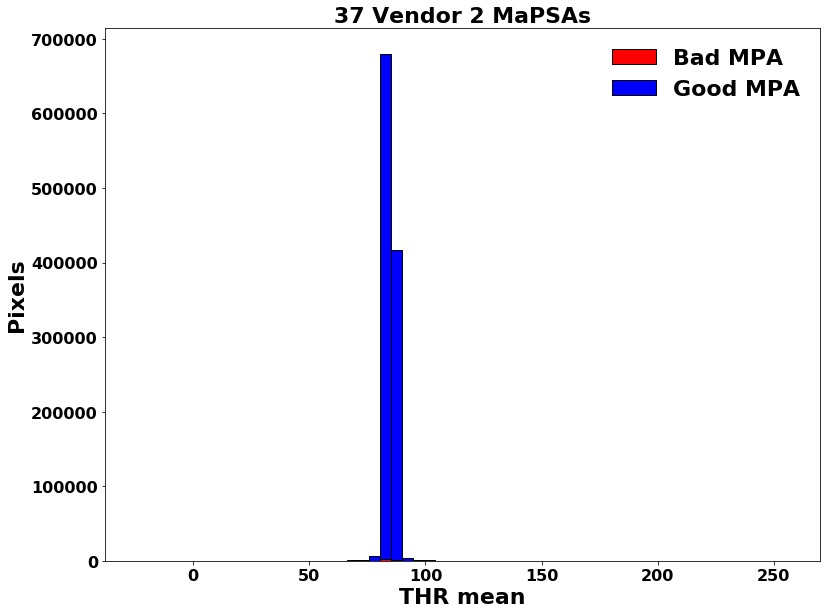

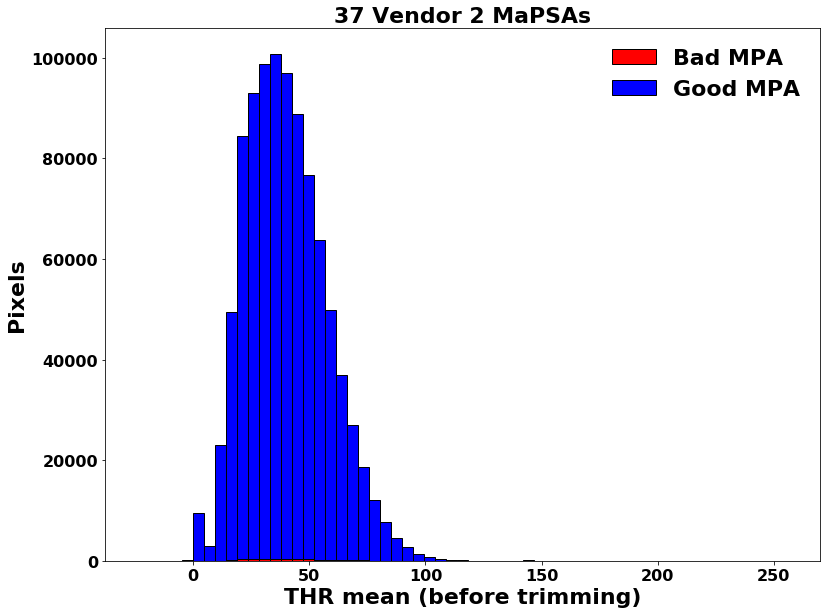

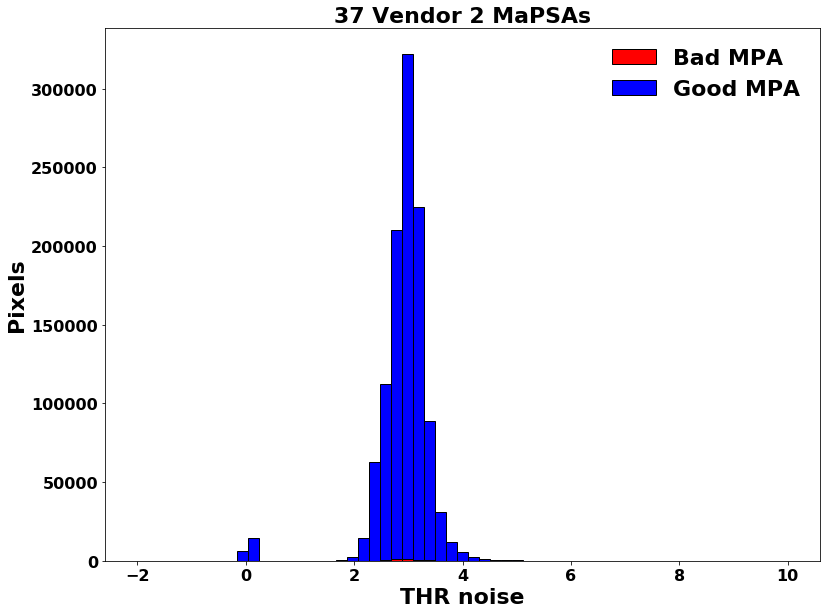

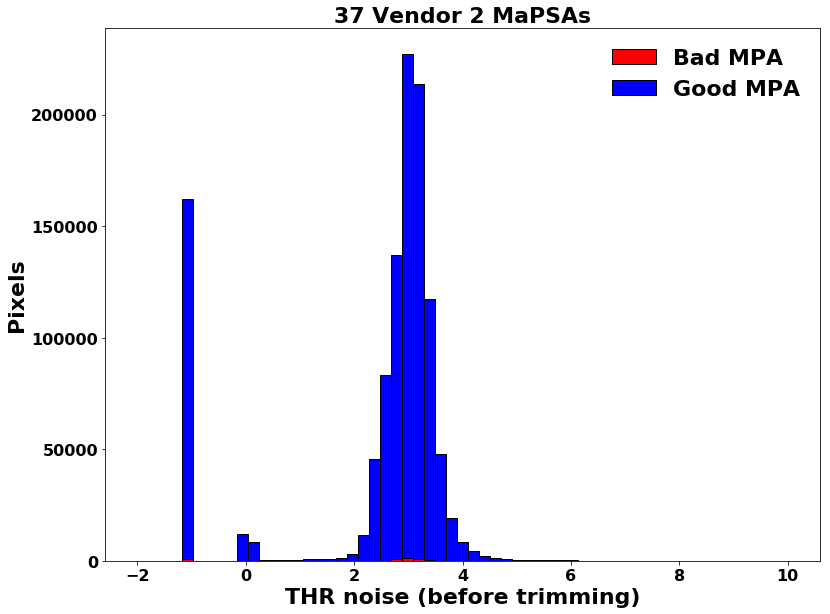

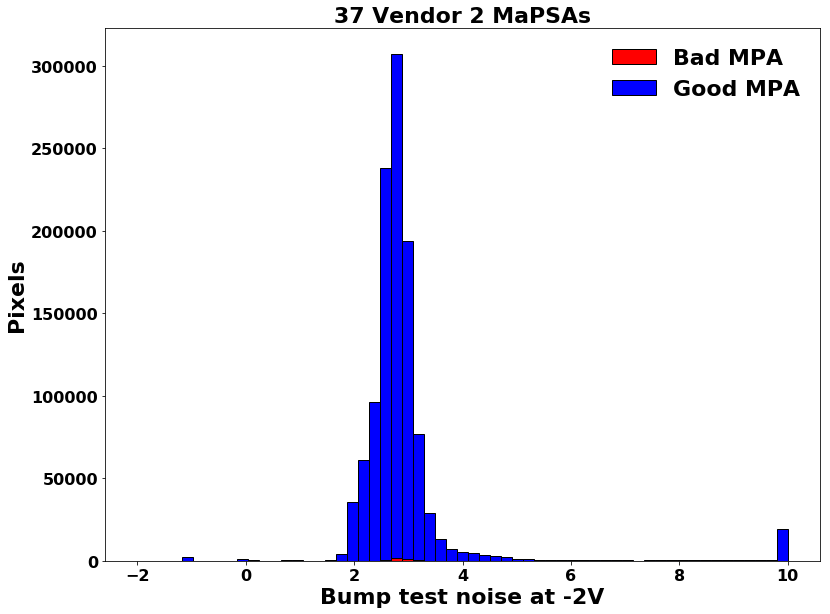

In [18]:
for c in cols:
    fig1 = plt.figure(figsize=(12,9))
    minval = -20
    maxval = 220
    nbins = 60
    if "RMS" in c:
        minval = -2
        maxval = 10
    if "Mean" in c:
        minval = -24
        maxval = 256
    if "mask" in c:
        minval = -1.5
        maxval = 1.5
        nbins = 4
        
    arr1 = np.clip(allpix_bad[c],minval,maxval)
    arr2 = np.clip(allpix[c],minval,maxval)
        
    plt.hist(np.array([arr1,arr2]),bins=np.linspace(minval,maxval,nbins),histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
    plt.xlabel(names[c],fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Bad MPA","Good MPA"],frameon=False)
    plt.tight_layout()
    plt.show()

    fig1.savefig(outdir+"/"+c+".png",bbox_inches='tight')
    fig1.savefig(outdir+"/"+c+".pdf",bbox_inches='tight')

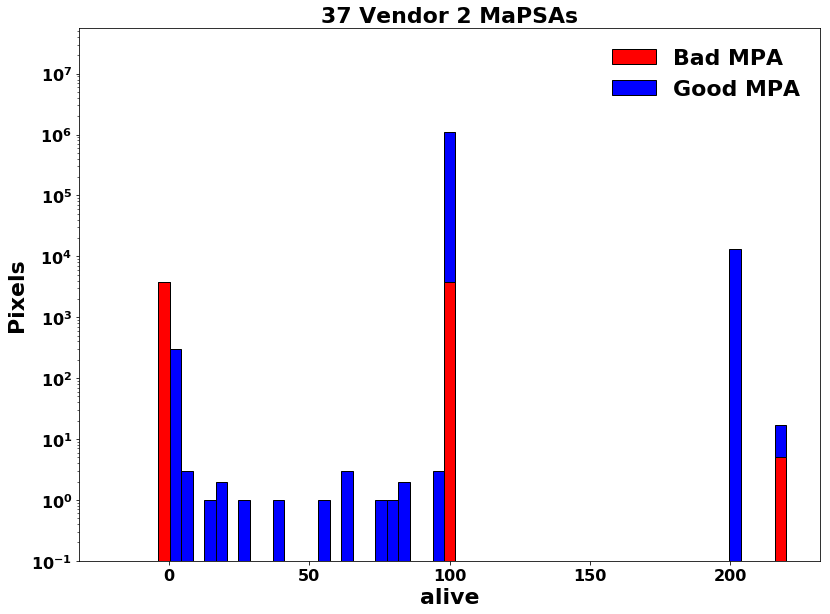

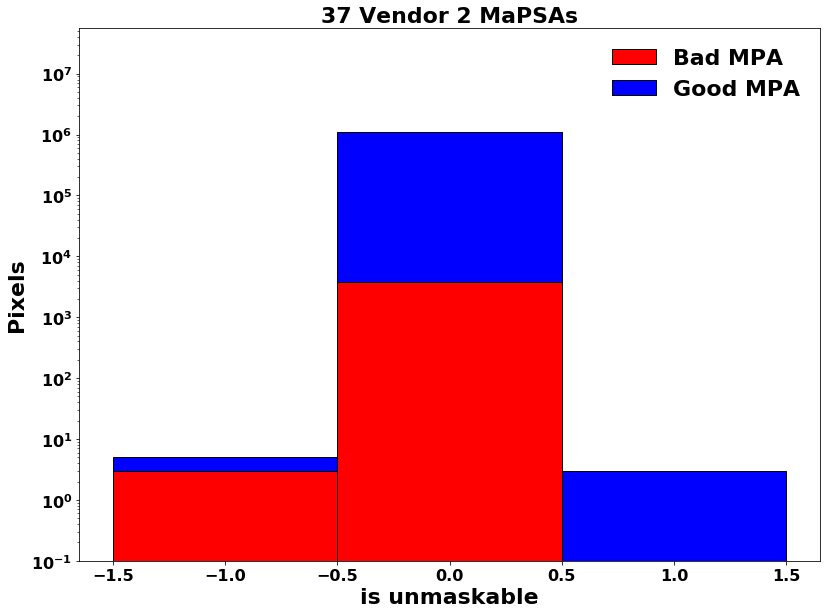

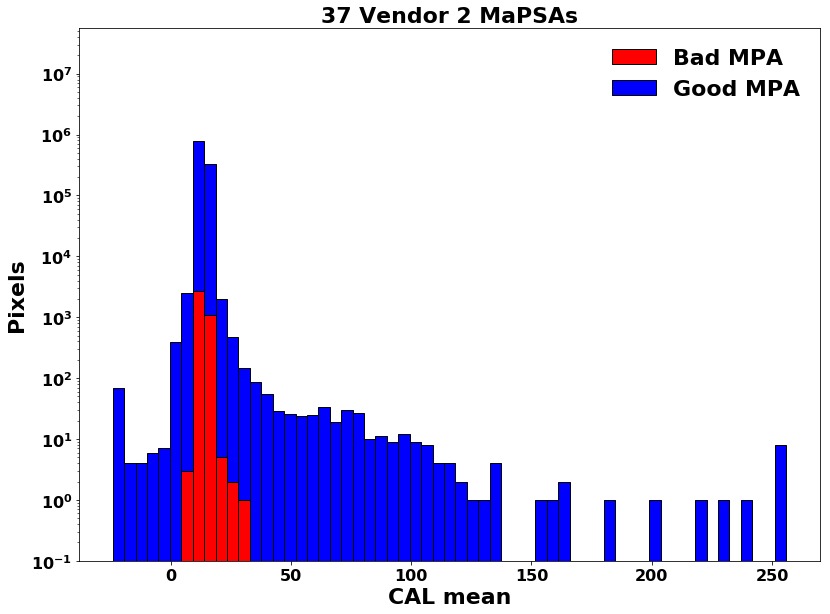

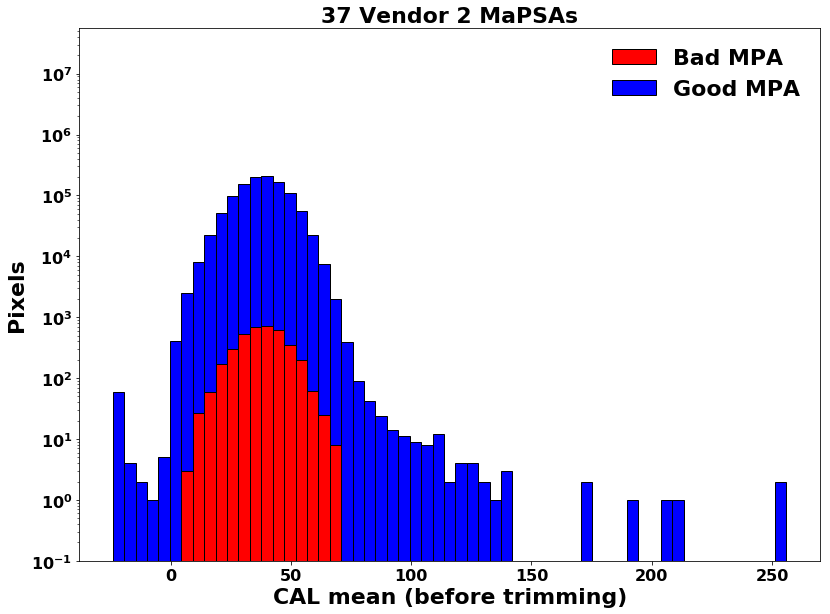

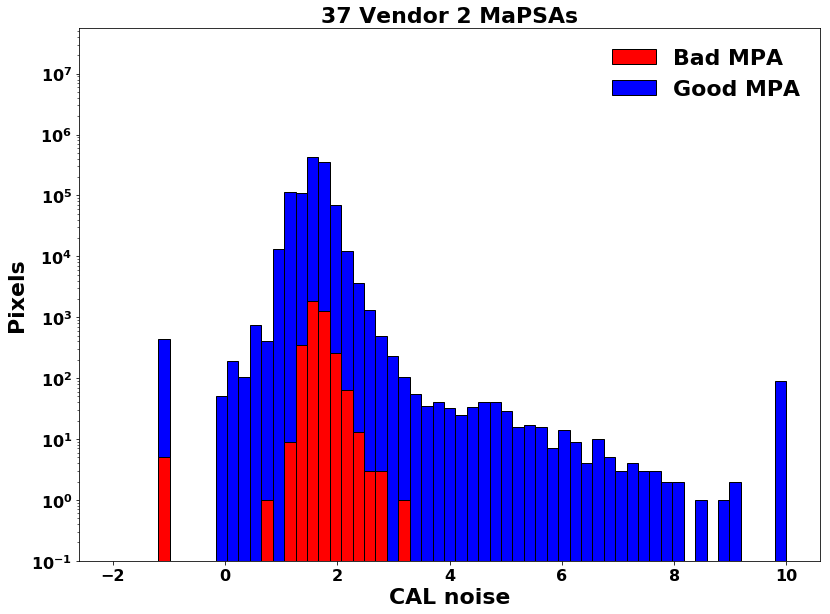

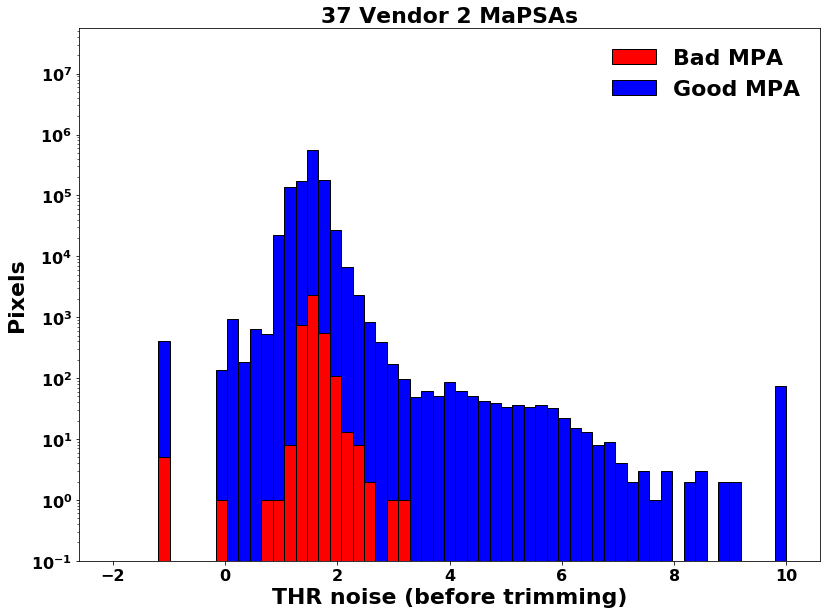

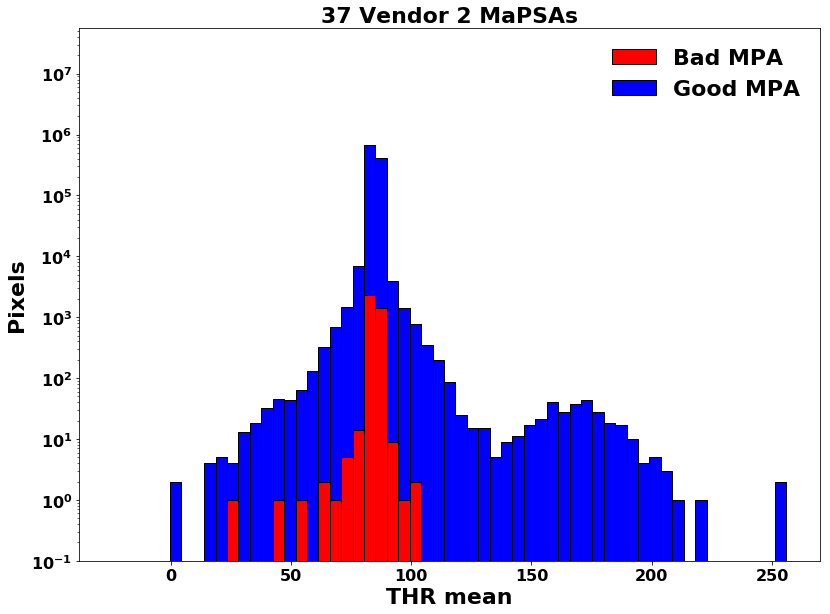

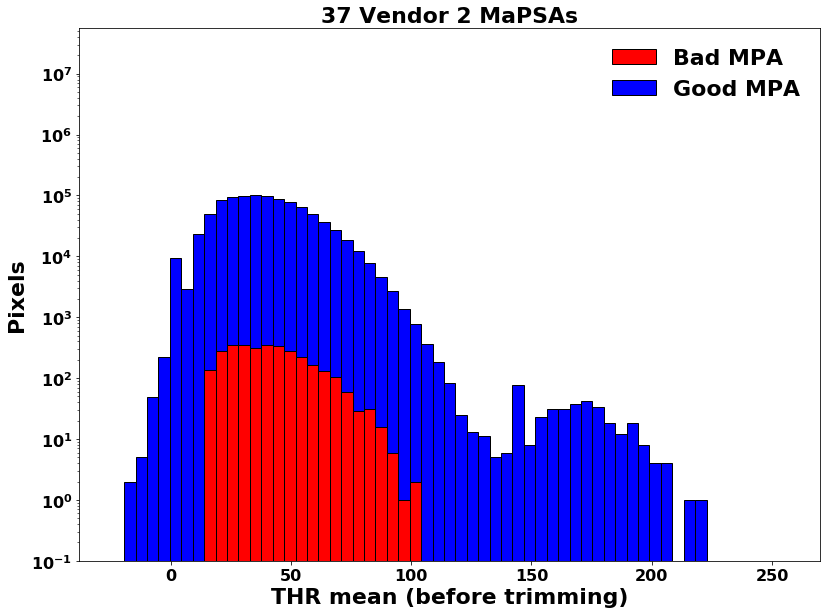

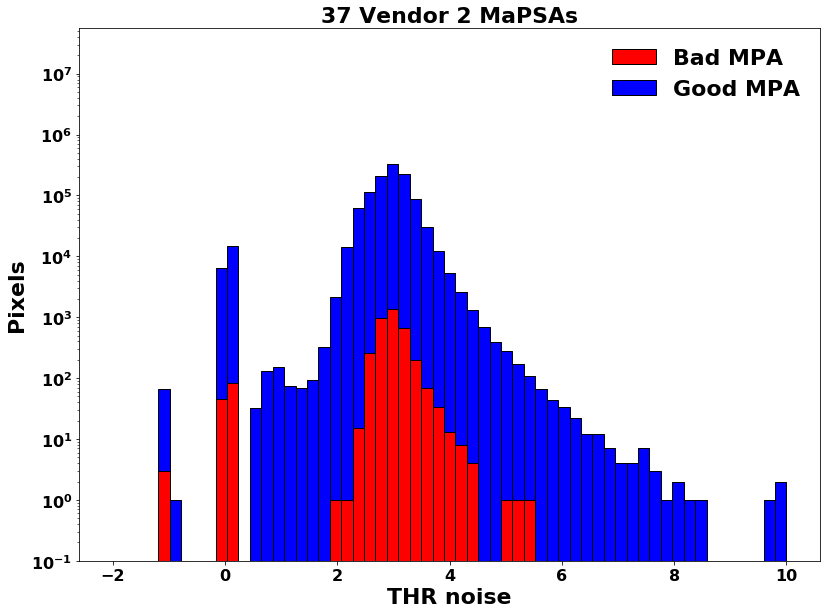

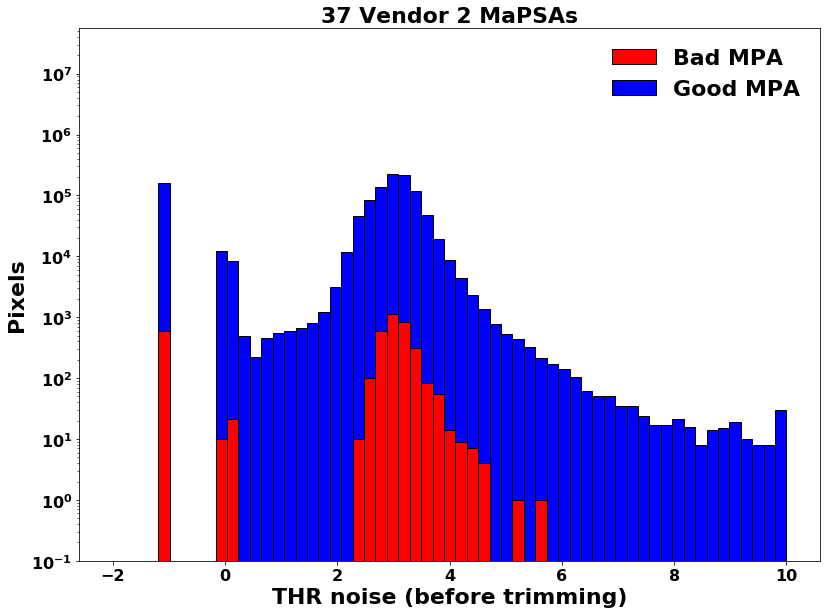

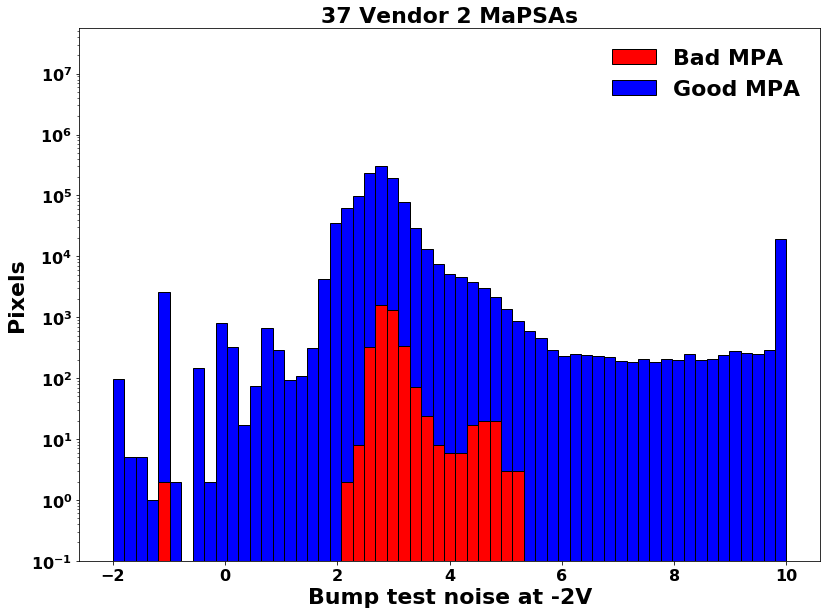

In [19]:
for c in cols:
    fig1 = plt.figure(figsize=(12,9))
    minval = -20
    maxval = 220
    nbins = 60
    if "RMS" in c:
        minval = -2
        maxval = 10
    if "Mean" in c:
        minval = -24
        maxval = 256
    if "mask" in c:
        minval = -1.5
        maxval = 1.5
        nbins = 4

    arr1 = np.clip(allpix_bad[c],minval,maxval)
    arr2 = np.clip(allpix[c],minval,maxval)
        
    plt.hist(np.array([arr1,arr2]),bins=np.linspace(minval,maxval,nbins),histtype='bar',stacked=True,color=['red','blue'],edgecolor='black')
    plt.xlabel(names[c],fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.yscale('log')
    plt.ylim([0.1,logmax])
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Bad MPA","Good MPA"],frameon=False)
    plt.tight_layout()
    plt.show()

    fig1.savefig(outdir+"/"+c+"_log.png",bbox_inches='tight')
    fig1.savefig(outdir+"/"+c+"_log.pdf",bbox_inches='tight')

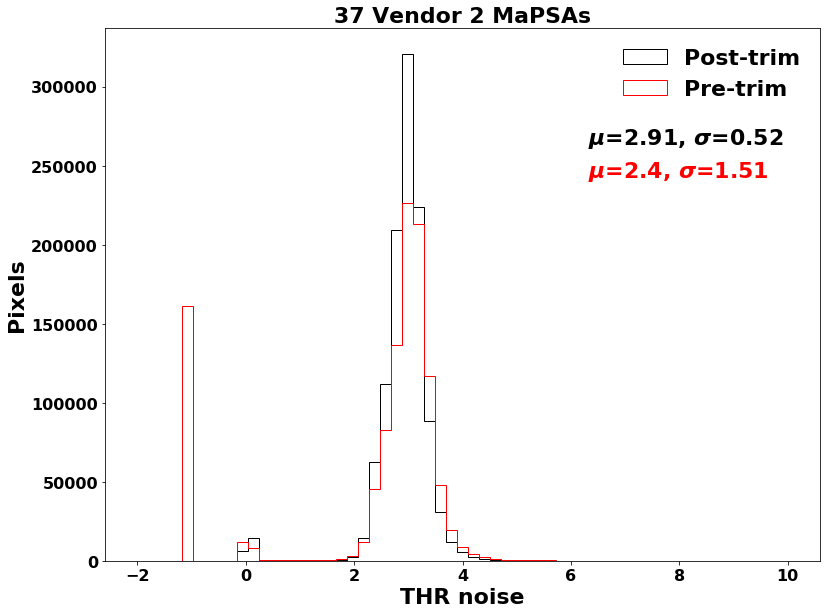

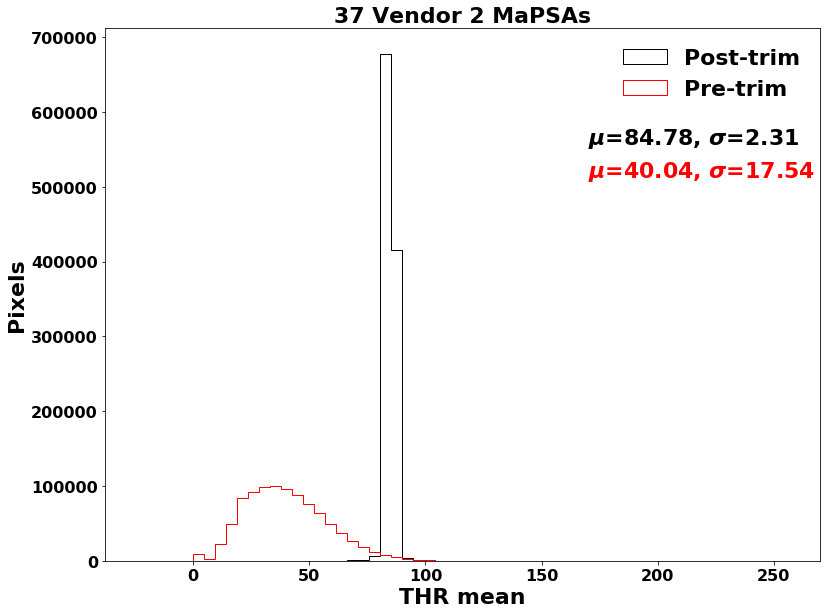

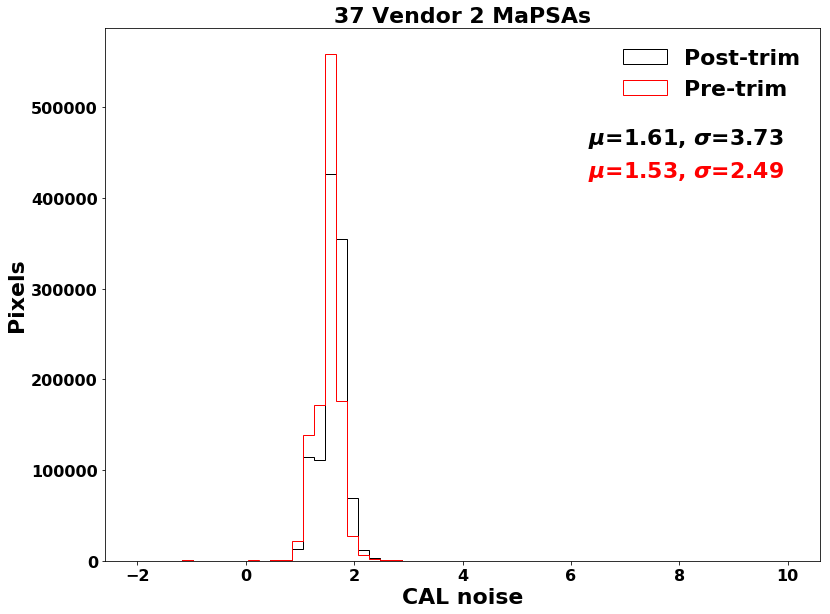

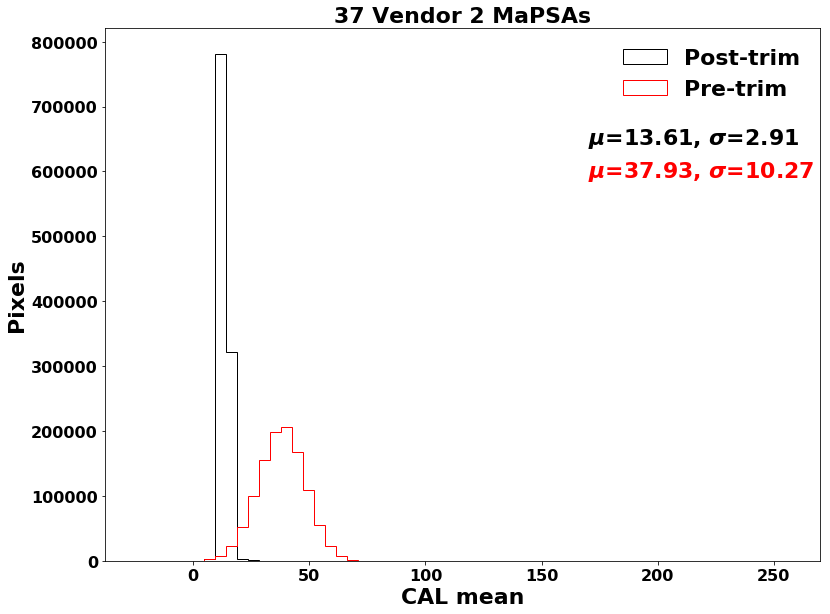

In [20]:
# noise overlay
scurve = ["THR","CAL"]

for s in scurve:

    bins = np.linspace(-2,10,60)
    minval = -2
    maxval = 10
    
    mu = np.mean(allpix[s+"_RMS"])
    sigma = np.std(allpix[s+"_RMS"])
    mu_pretrim = np.mean(allpix[s+"_RMS_pretrim"])
    sigma_pretrim = np.std(allpix[s+"_RMS_pretrim"])
    
    fig1 = plt.figure(figsize=(12,9))
    plt.hist(np.clip(allpix[s+"_RMS"],minval,maxval),bins=bins,histtype='step',color='black')
    plt.hist(np.clip(allpix[s+"_RMS_pretrim"],minval,maxval),bins=bins,histtype='step',color='red')
    plt.xlabel(s+" noise",fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Post-trim","Pre-trim"],frameon=False)
    
    plt.figtext(.7,.75,"$\mu$="+str(round(mu,2))+", $\sigma$="+str(round(sigma,2)))
    plt.figtext(.7,.7,"$\mu$="+str(round(mu_pretrim,2))+", $\sigma$="+str(round(sigma_pretrim,2)),color='red')
    
    plt.tight_layout()
    plt.show()

    fig1.savefig(outdir+"/"+s+"_RMS_trim.png",bbox_inches='tight')
    fig1.savefig(outdir+"/"+s+"_RMS_trim.pdf",bbox_inches='tight')
    
    bins = np.linspace(-24,256,60)
    minval = -24
    maxval = 256
    
    mu = np.mean(allpix[s+"_Mean"])
    sigma = np.std(allpix[s+"_Mean"])
    mu_pretrim = np.mean(allpix[s+"_Mean_pretrim"])
    sigma_pretrim = np.std(allpix[s+"_Mean_pretrim"])
    
    fig2 = plt.figure(figsize=(12,9))
    plt.hist(np.clip(allpix[s+"_Mean"],minval,maxval),bins=bins,histtype='step',color='black')
    plt.hist(np.clip(allpix[s+"_Mean_pretrim"],minval,maxval),bins=bins,histtype='step',color='red')
    plt.xlabel(s+" mean",fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Post-trim","Pre-trim"],frameon=False)
    
    plt.figtext(.7,.75,"$\mu$="+str(round(mu,2))+", $\sigma$="+str(round(sigma,2)))
    plt.figtext(.7,.7,"$\mu$="+str(round(mu_pretrim,2))+", $\sigma$="+str(round(sigma_pretrim,2)),color='red')
  
    plt.tight_layout()
    plt.show()

    fig2.savefig(outdir+"/"+s+"_Mean_trim.png",bbox_inches='tight')
    fig2.savefig(outdir+"/"+s+"_Mean_trim.pdf",bbox_inches='tight')

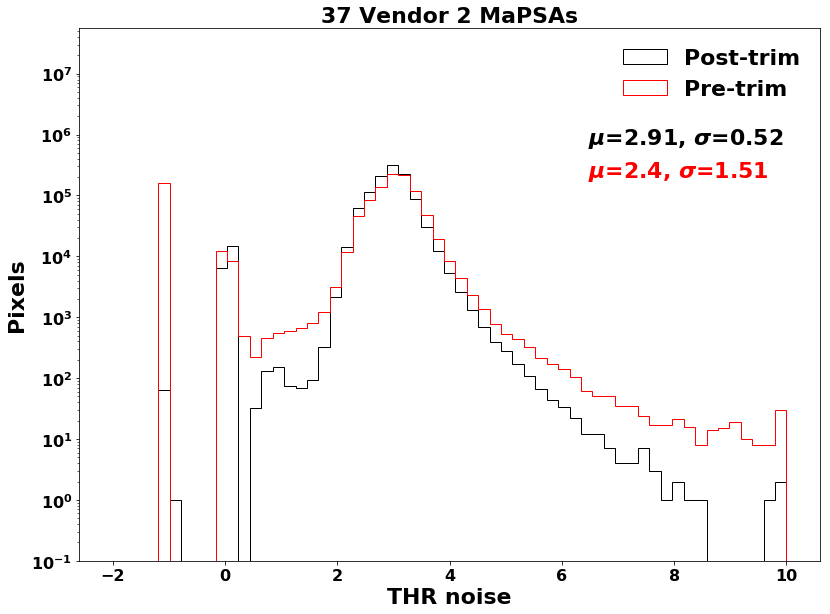

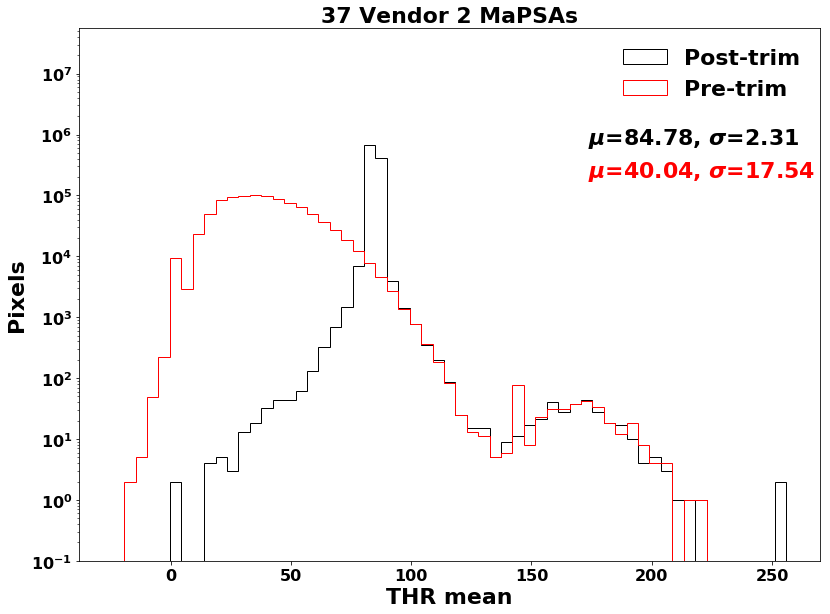

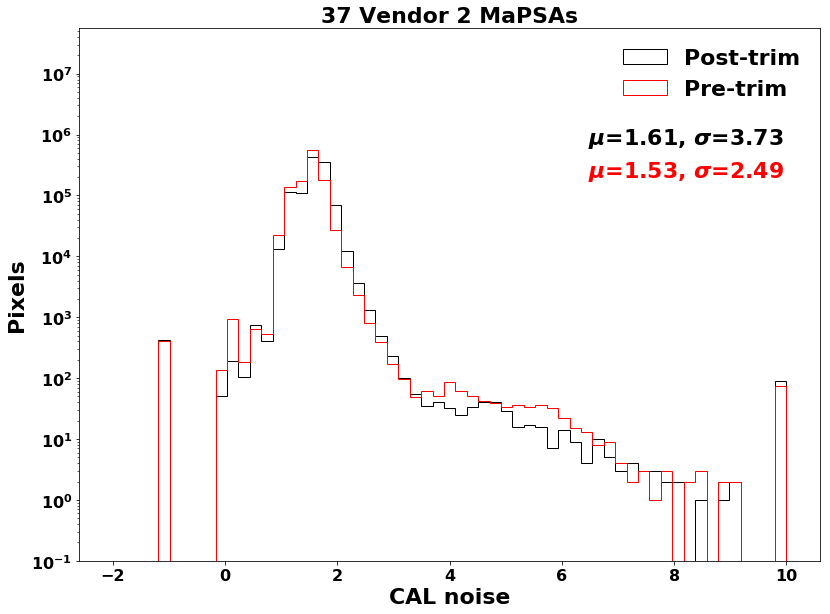

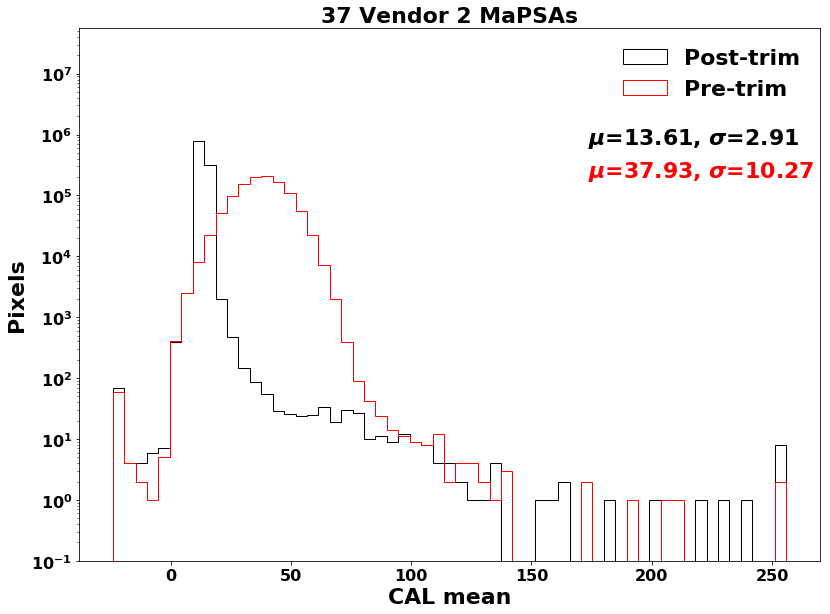

In [21]:
# noise overlay
for s in scurve:
    
    bins = np.linspace(-2,10,60)
    minval = -2
    maxval = 10
    
    mu = np.mean(allpix[s+"_RMS"])
    sigma = np.std(allpix[s+"_RMS"])
    mu_pretrim = np.mean(allpix[s+"_RMS_pretrim"])
    sigma_pretrim = np.std(allpix[s+"_RMS_pretrim"])

    fig1 = plt.figure(figsize=(12,9))
    plt.hist(np.clip(allpix[s+"_RMS"],minval,maxval),bins=bins,histtype='step',color='black')
    plt.hist(np.clip(allpix[s+"_RMS_pretrim"],minval,maxval),bins=bins,histtype='step',color='red')
    plt.xlabel(s+" noise",fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Post-trim","Pre-trim"],frameon=False)
    
    plt.figtext(.7,.75,"$\mu$="+str(round(mu,2))+", $\sigma$="+str(round(sigma,2)))
    plt.figtext(.7,.7,"$\mu$="+str(round(mu_pretrim,2))+", $\sigma$="+str(round(sigma_pretrim,2)),color='red')
    
    plt.yscale('log')
    plt.ylim([0.1,logmax])
    plt.tight_layout()
    plt.show()

    fig1.savefig(outdir+"/"+s+"_RMS_trim_log.png",bbox_inches='tight')
    fig1.savefig(outdir+"/"+s+"_RMS_trim_log.pdf",bbox_inches='tight')
    
    bins = np.linspace(-24,256,60)
    minval = -24
    maxval = 256
    
    mu = np.mean(allpix[s+"_Mean"])
    sigma = np.std(allpix[s+"_Mean"])
    mu_pretrim = np.mean(allpix[s+"_Mean_pretrim"])
    sigma_pretrim = np.std(allpix[s+"_Mean_pretrim"])
    
    fig2 = plt.figure(figsize=(12,9))
    plt.hist(np.clip(allpix[s+"_Mean"],minval,maxval),bins=np.linspace(-24,256,60),histtype='step',color='black')
    plt.hist(np.clip(allpix[s+"_Mean_pretrim"],minval,maxval),bins=np.linspace(-24,256,60),histtype='step',color='red')
    plt.xlabel(s+" mean",fontweight='bold')
    plt.ylabel("Pixels",fontweight='bold')
    plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(["Post-trim","Pre-trim"],frameon=False)
    
    plt.figtext(.7,.75,"$\mu$="+str(round(mu,2))+", $\sigma$="+str(round(sigma,2)))
    plt.figtext(.7,.7,"$\mu$="+str(round(mu_pretrim,2))+", $\sigma$="+str(round(sigma_pretrim,2)),color='red')
    
    plt.yscale('log')
    plt.ylim([0.1,logmax])
    plt.tight_layout()
    plt.show()

    fig2.savefig(outdir+"/"+s+"_Mean_trim_log.png",bbox_inches='tight')
    fig2.savefig(outdir+"/"+s+"_Mean_trim_log.pdf",bbox_inches='tight')

Processing 37 MaPSAs for 2D pa map


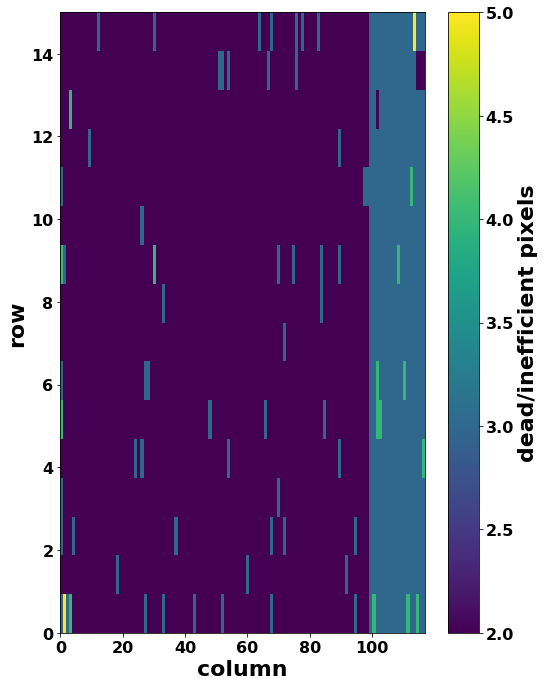

Processing 37 MaPSAs for 2D mask map


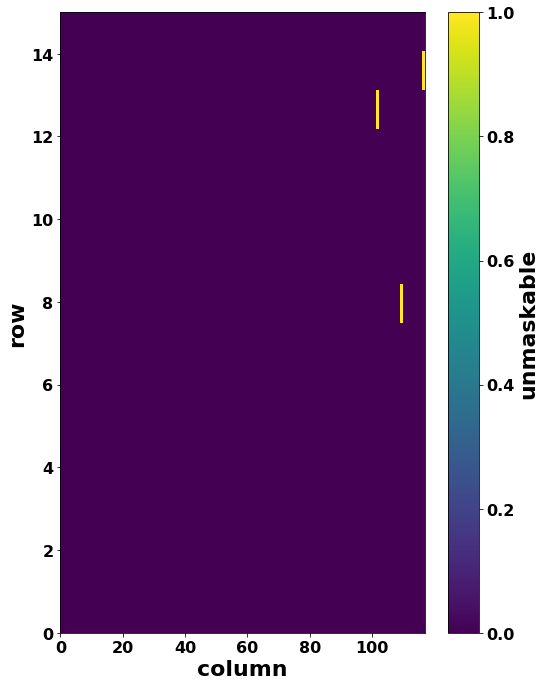

In [22]:
# 2D pixel alive map
cols = ["pa","mask"]
nams = {}
names["pa"] = "dead/inefficient pixels"
names["mask"] = "unmaskable"

for c in cols:
    print("Processing " + str(len(mapsas)) + " MaPSAs for 2D "+c+" map")

    allpix = pd.DataFrame([0]*1888,columns=["w"])
    for m in mapsas:
        for chip in m.mpa_chips:
            if c == "pa":
                allpix["w"][chip.pixels[c]<100] += 1
            if c == "mask":
                allpix["w"][chip.pixels[c]>0] += 1
                
    x, y = np.meshgrid(np.linspace(0,117,118),np.linspace(0,15,16))

    xflat = x.reshape(-1)
    yflat = y.reshape(-1)

    fig, ax = plt.subplots(figsize=(8,10))
    plt.hist2d(xflat,yflat,bins=[118,16],weights=allpix["w"])

    cbar = plt.colorbar()
    cbar.set_label(names[c],fontweight='bold')

    ax.set_xlabel("column",fontweight='bold')
    ax.set_ylabel("row",fontweight='bold')
 
    plt.tight_layout()
    plt.show()

    fig.savefig(outdir+"/"+c+"_2dmap_all.png",bbox_inches='tight')
    fig.savefig(outdir+"/"+c+"_2dmap_all.pdf",bbox_inches='tight')

Processing 37 MaPSAs for 2D pixel alive map
Skipping QP_no14-2
Skipping QP_no14-3
Skipping QP_no18p2-14
Skipping QP_no27p1-13


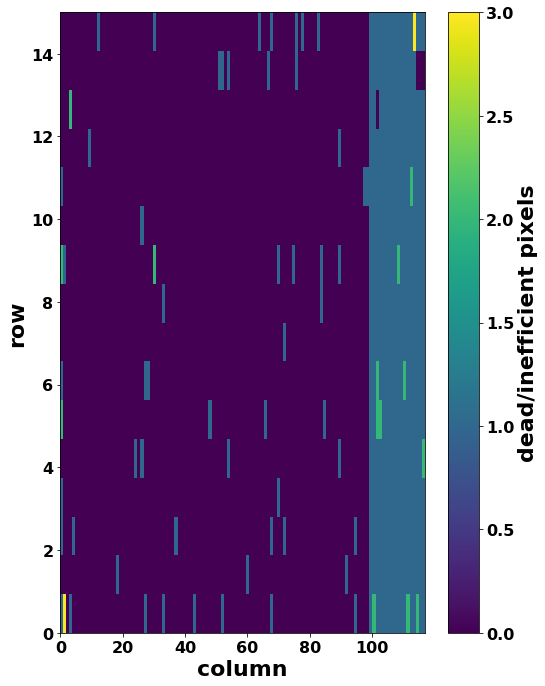

In [23]:
# 2D pixel alive map
print("Processing " + str(len(mapsas)) + " MaPSAs for 2D pixel alive map")

allpix = pd.DataFrame([0]*1888,columns=["w"])
for m in mapsas:
    for chip in m.mpa_chips:
        if chip.mapsa_name+"-"+str(chip.index) in badchips:
            print("Skipping " + chip.mapsa_name + "-"+str(chip.index))
        else:
            allpix["w"][chip.pixels["pa"]<100] += 1

x, y = np.meshgrid(np.linspace(0,117,118),np.linspace(0,15,16))

xflat = x.reshape(-1)
yflat = y.reshape(-1)

fig, ax = plt.subplots(figsize=(8,10))
plt.hist2d(xflat,yflat,bins=[118,16],weights=allpix["w"])

cbar = plt.colorbar()
cbar.set_label("dead/inefficient pixels",fontweight='bold')

ax.set_xlabel("column",fontweight='bold')
ax.set_ylabel("row",fontweight='bold')
 
plt.tight_layout()
plt.show()

fig.savefig(outdir+"/pa_2dmap_good.png",bbox_inches='tight')
fig.savefig(outdir+"/pa_2dmap_good.pdf",bbox_inches='tight')

Processing 37 MaPSAs for 2D pixel alive map


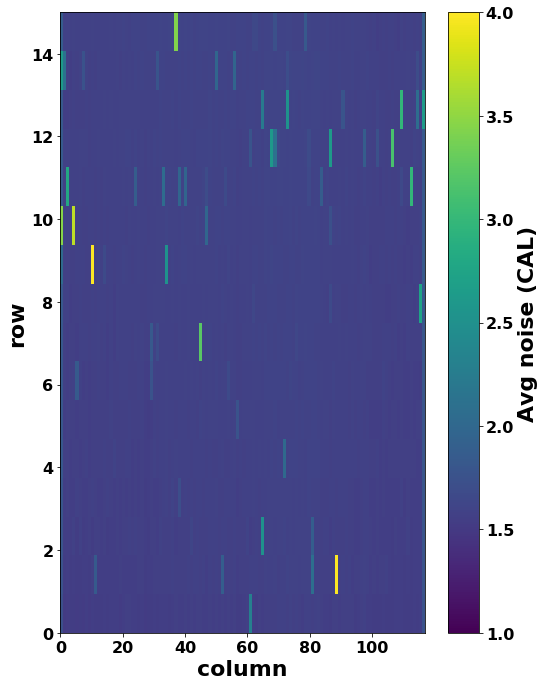

In [24]:
# 2D pixel noise map
print("Processing " + str(len(mapsas)) + " MaPSAs for 2D pixel alive map")

allpix = pd.DataFrame([0]*1888,columns=["w"])
for m in mapsas:
    for chip in m.mpa_chips:
        allpix["w"] += np.nan_to_num(chip.pixels["CAL_RMS"])

x, y = np.meshgrid(np.linspace(0,117,118),np.linspace(0,15,16))

xflat = x.reshape(-1)
yflat = y.reshape(-1)

fig, ax = plt.subplots(figsize=(8,10))
plt.hist2d(xflat,yflat,bins=[118,16],weights=allpix["w"]/(16.*len(mapsas)))
cbar = plt.colorbar()
plt.clim(1,4)
cbar.set_label("Avg noise (CAL)",fontweight='bold')

ax.set_xlabel("column",fontweight='bold')
ax.set_ylabel("row",fontweight='bold')
 
plt.tight_layout()
plt.show()

fig.savefig(outdir+"/CAL_RMS_2dmap_all.png",bbox_inches='tight')
fig.savefig(outdir+"/CAL_RMS_2dmap_all.pdf",bbox_inches='tight')

Processing 37 MaPSAs for 2D pixel alive map


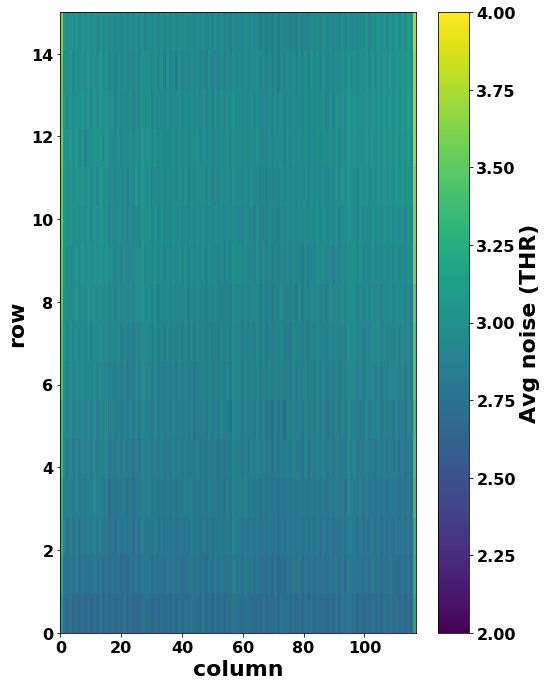

In [25]:
# 2D pixel noise map
print("Processing " + str(len(mapsas)) + " MaPSAs for 2D pixel alive map")

allpix = pd.DataFrame([0]*1888,columns=["w"])
for m in mapsas:
    for chip in m.mpa_chips:
        allpix["w"] += np.nan_to_num(chip.pixels["THR_RMS"])

x, y = np.meshgrid(np.linspace(0,117,118),np.linspace(0,15,16))

xflat = x.reshape(-1)
yflat = y.reshape(-1)

fig, ax = plt.subplots(figsize=(8,10))
plt.hist2d(xflat,yflat,bins=[118,16],weights=allpix["w"]/(16.*len(mapsas)))
cbar = plt.colorbar()
plt.clim(2,4)
cbar.set_label("Avg noise (THR)",fontweight='bold')

ax.set_xlabel("column",fontweight='bold')
ax.set_ylabel("row",fontweight='bold')
 
plt.tight_layout()
plt.show()

fig.savefig(outdir+"/THR_RMS_2dmap_all.png",bbox_inches='tight')
fig.savefig(outdir+"/THR_RMS_2dmap_all.pdf",bbox_inches='tight')

Processing 37 MaPSAs for 2D pixel alive map


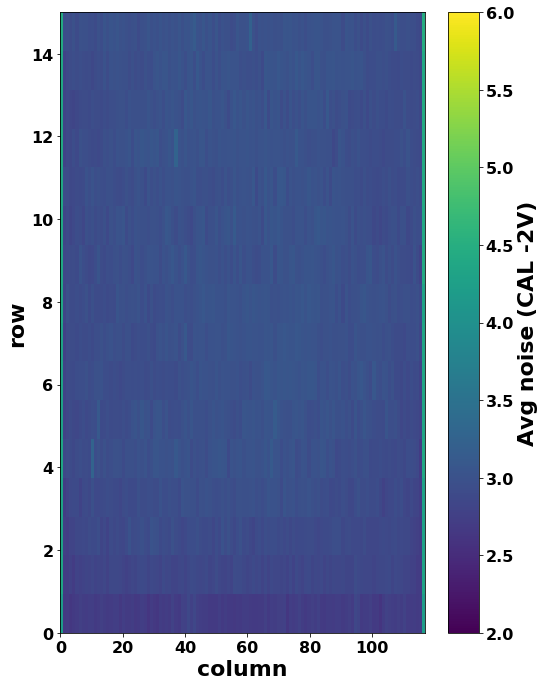

In [26]:
# 2D pixel noise map
print("Processing " + str(len(mapsas)) + " MaPSAs for 2D pixel alive map")

allpix = pd.DataFrame([0]*1888,columns=["w"])
for m in mapsas:
    for chip in m.mpa_chips:
        allpix["w"] += np.nan_to_num(chip.pixels["Bump_RMS"])

x, y = np.meshgrid(np.linspace(0,117,118),np.linspace(0,15,16))

xflat = x.reshape(-1)
yflat = y.reshape(-1)

fig, ax = plt.subplots(figsize=(8,10))
plt.hist2d(xflat,yflat,bins=[118,16],weights=allpix["w"]/(16.*len(mapsas)))
cbar = plt.colorbar()
plt.clim(2,6)
cbar.set_label("Avg noise (CAL -2V)",fontweight='bold')

ax.set_xlabel("column",fontweight='bold')
ax.set_ylabel("row",fontweight='bold')
 
plt.tight_layout()
plt.show()

fig.savefig(outdir+"/Bump_2dmap_all.png",bbox_inches='tight')
fig.savefig(outdir+"/Bump_2dmap_all.pdf",bbox_inches='tight')